In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
def standardize_data(X):
    """Standardizes the dataset using Z-score normalization."""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [4]:
def pca_svd(X):
    """Performs PCA using SVD and returns the transformed data."""
    # Standardize data
    X_scaled = standardize_data(X)
    print("Data standardized")
    # Compute SVD
    U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)       # 'full_matrices = False' produces reduced-size matrices making it more efficient for large datasets.
    print("SVD completed")
    return X_scaled, Vt, S
    

In [5]:
def reconstruct(pc, k):
    # Select top k components (rows of Vt)
    principal_components = pc[:k]
    # Project data onto top k principal components
    X_reduced = np.dot(X_scaled, principal_components.T)
    return X_reduced

In [6]:
# Example usage
file_path = "/Users/vishrutgupta/Desktop/ISRO_bah_2025/merged_data_combined.csv"
df = pd.read_csv(file_path, na_values=[-1e+31, '-1e+31'])
print("Orig shape: ", df.shape)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
cme_column = df['CME'] if 'CME' in df.columns else None
cols_to_drop = ['epoch_for_cdf_mod', 'CME', 'HALO']
df = df.drop(columns = cols_to_drop)
print("Shape after dropping cols: ", df.shape)

print("data loaded")
# Convert DataFrame to NumPy array
df = df.values

# Perform PCA and reduce dimensions
X_scaled, principal_components, S = pca_svd(df)
print("Normalized data shape: ", X_scaled.shape)

# Print eigenvectors and eigenvalues
eigenvectors = principal_components  # Rows of Vt[:k]
# print(eigenvectors.shape)
eigenvalues = (S**2) / (df.shape[0] - 1)  # Convert singular values to eigenvalues
eigenvalues = eigenvalues.round(4)

print("\nEigenvectors (Top-k Principal Components):")
print(eigenvectors)

print("PC   Variance explained   Total variance")
total_e = sum(eigenvalues)
sum_v = 0
for i in range(len(eigenvalues)):
    variance_exp = (eigenvalues[i] / total_e * 100).round(2)
    sum_v += variance_exp
    print(f"{i}  {variance_exp}          {sum_v.round(2)}")

Orig shape:  (5130185, 15)
Shape after dropping cols:  (1992258, 12)
data loaded
Data standardized
SVD completed
Normalized data shape:  (1992258, 12)

Eigenvectors (Top-k Principal Components):
[[-1.41991950e-01  4.46595263e-01 -4.46595263e-01  2.36245678e-01
   1.91990303e-01  3.90436395e-01 -8.44510079e-02  4.44374657e-01
   3.59867285e-01 -2.88233515e-02  2.88602528e-02  7.86015767e-03]
 [ 8.41509033e-03 -2.93810985e-02  2.93810985e-02  7.57091412e-03
  -2.88706894e-02  5.25416410e-03  6.43141853e-04 -3.21415667e-02
   5.60644612e-03 -6.92068044e-01  6.93821481e-01  1.89401416e-01]
 [-6.78580132e-01 -7.16904280e-02  7.16904280e-02  2.21032030e-02
   5.61162684e-02 -1.33002634e-01 -7.04933288e-01 -5.29116397e-02
  -9.03863071e-02 -2.56389275e-03  2.48382306e-03 -3.11003664e-03]
 [-5.47410311e-03  2.98240300e-01 -2.98240300e-01 -5.55718064e-01
   2.40995475e-01 -3.90527441e-01  5.52681073e-02  3.05691192e-01
  -4.51938022e-01 -3.09467862e-02  3.08696212e-02  1.46008187e-03]
 [ 5.9154

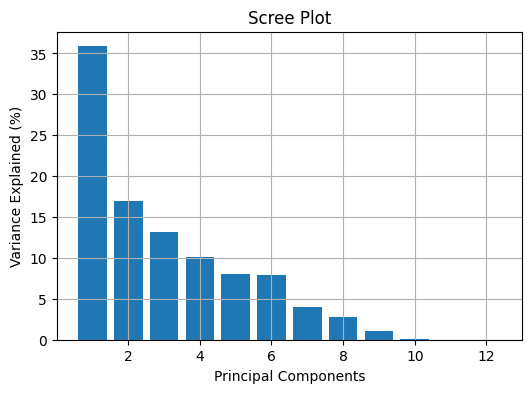

In [7]:
# Scree Plot (Variance Explained)
explained_variance = S**2 / np.sum(S**2)
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(S) + 1), explained_variance * 100)
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained (%)")
plt.title("Scree Plot")
plt.grid()
plt.show()

In [14]:
# Save data
X_reduced = reconstruct(pc = principal_components, k = 6)
X_reduced = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])])
print("Reconstructed dataset shape: ", X_reduced.shape)
# X_reduced_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(X_reduced.shape[1])])
if cme_column is not None and len(cme_column) == len(X_reduced):
    X_reduced['CME'] = cme_column.reset_index(drop=True)
    print("CME column successfully appended.")
else:
    print("Warning: CME column not appended due to length mismatch or missing column.")

X_reduced.to_csv("lpca_90perc.csv", index=False)
print("\nSaved reduced data with CME column to lpca_90perc.csv")


Reconstructed dataset shape:  (1992258, 6)
CME column successfully appended.

Saved reduced data with CME column to lpca_90perc.csv
